In [160]:
import tensorflow as tf

In [161]:
a=tf.constant(3)

In [162]:
b=tf.Variable(4)

In [163]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [164]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=4>

In [165]:
a-b

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [166]:
a/b

<tf.Tensor: shape=(), dtype=float64, numpy=0.75>

In [167]:
c=a-b

In [168]:
c=c+2

In [169]:
c


<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [170]:
b.assign(10)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>

In [171]:
b.assign_add(2)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=12>

In [172]:
b.assign_sub(3)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=9>

In [173]:
a.numpy()

3

In [174]:
b.numpy()

9

In [175]:
a=tf.constant([1,2,3,44,5,68],shape=(3,2))

In [176]:
a

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 1,  2],
       [ 3, 44],
       [ 5, 68]])>

In [177]:
b=tf.constant([2,3,4,5,67,8],shape=(2,3))

In [178]:
b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 2,  3,  4],
       [ 5, 67,  8]])>

In [179]:
a@b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  12,  137,   20],
       [ 226, 2957,  364],
       [ 350, 4571,  564]])>

In [180]:
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  12,  137,   20],
       [ 226, 2957,  364],
       [ 350, 4571,  564]])>

In [181]:
p=tf.constant([2,3,45,7,8,7],shape=(2,3))

In [182]:
b@p.numpy().T

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[193,  66],
       [571, 627]])>

In [183]:
b@tf.linalg.matrix_transpose(p)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[193,  66],
       [571, 627]])>

In [184]:
tf.matmul(b,p,transpose_b=True)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[193,  66],
       [571, 627]])>

In [185]:
tf.linalg.inv(tf.constant([1,2,3,4],shape=(2,2),dtype=float))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2.0000002 ,  1.0000001 ],
       [ 1.5000001 , -0.50000006]], dtype=float32)>

# Gradients in Tensorflow

In [186]:
def func(x):
    return x**2+5*x+tf.math.cos(x)

func(5.0)

<tf.Tensor: shape=(), dtype=float32, numpy=50.28366>

In [187]:
x=tf.Variable(3,dtype=float)
with tf.GradientTape() as g:
    y=func(x)
    

In [188]:
print(g.gradient(y,x))

tf.Tensor(10.85888, shape=(), dtype=float32)


In [189]:
grad_val=[]
func_val=[]
x_val=[]
x=tf.Variable(0,dtype=float)

for i in range(100):
    with tf.GradientTape() as g:
        y=func(x)
    x.assign_add(0.5)
    x_val.append(x.numpy())
    grad_val.append(g.gradient(y,x).numpy())
    func_val.append(y.numpy())

In [190]:
import seaborn as sns
%matplotlib inline

In [191]:
import pandas as pd

In [192]:
df=pd.DataFrame({"x_val":x_val,"grad_val":grad_val,"func_val":func_val})

In [193]:
df

,x_val,grad_val,func_val
0,0.5,5.000000,1.000000
1,1.0,5.520575,3.627583
2,1.5,6.158529,6.540302
3,2.0,7.002505,9.820737
4,2.5,8.090702,13.583853
...,...,...,...
95,48.0,100.367302,2492.819824
96,48.5,101.768257,2543.359863
97,49.0,102.981110,2594.556641
98,49.5,103.953751,2646.300537


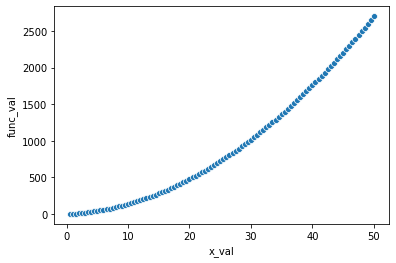

In [194]:
sns.scatterplot(y=df['func_val'],x=df['x_val'])

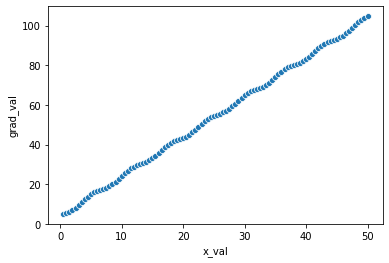

In [195]:
sns.scatterplot(x=df['x_val'],y=df['grad_val'])

# Simple linear regression using gradient tape


In [196]:
import numpy as np

In [197]:
x1=np.random.randint(0,30,200000)
x2=np.random.randint(0,30,200000)
data=pd.DataFrame({"x1":x1,"x2":x2})
y=2+4*x1+8*x2+5*np.random.random(200000)


In [198]:
data.shape

(200000, 2)

In [199]:
class preds:
    def __init__(self):
        self.w1=tf.Variable(0,dtype=float)
        self.w2=tf.Variable(0.0)
        self.b=tf.Variable(0.0)
    
    def __call__(self,data):
        result=self.w1*data.iloc[:,0]+self.w2*data.iloc[:,1]+self.b
        return (result)
    

In [200]:
model=preds()

In [201]:
model(data).numpy()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [202]:
def loss(predicted_y,target_y):
    return tf.reduce_mean(tf.square(predicted_y-target_y))

In [203]:
def train(model,inputs,outputs,learning_rate):
    with tf.GradientTape() as g:
        current_loss=loss(model(inputs),outputs)
    dw1,dw2,db=g.gradient(current_loss,[model.w1,model.w2,model.b])
    model.w1.assign_sub(learning_rate*dw1)
    model.w2.assign_sub(learning_rate*dw2)
    model.b.assign_sub(learning_rate*db)
        

In [204]:
model=preds()

w1s=[]
w2s=[]
bs=[]

for epoch in range(1000):
    w1s.append(model.w1.numpy())
    w2s.append(model.w2.numpy())
    bs.append(model.b.numpy())
    
    rand_int=np.random.choice(range(data.shape[0]),100)
    outputs=y[rand_int]
    inputs=data.iloc[rand_int,:]
    
    current_loss=loss(model(inputs),outputs)
    
    train(model,inputs,outputs,learning_rate=0.0001)
    
    print('Epcoh %2d W1=%1.2f W2=%1.2f b=%1.2f loss=%2.5f'%(epoch,w1s[-1],w2s[-1],bs[-1],current_loss))
    

Epcoh  0 W1=0.00 W2=0.00 b=0.00 loss=37437.75391
Epcoh  1 W1=0.60 W2=0.61 b=0.04 loss=31309.15234
Epcoh  2 W1=1.17 W2=1.18 b=0.07 loss=26730.17578
Epcoh  3 W1=1.62 W2=1.76 b=0.10 loss=22973.82031
Epcoh  4 W1=2.08 W2=2.30 b=0.13 loss=15356.18848
Epcoh  5 W1=2.42 W2=2.71 b=0.15 loss=13528.00977
Epcoh  6 W1=2.76 W2=3.10 b=0.17 loss=9758.74707
Epcoh  7 W1=3.05 W2=3.41 b=0.19 loss=8376.69629
Epcoh  8 W1=3.30 W2=3.70 b=0.20 loss=7377.10498
Epcoh  9 W1=3.52 W2=4.00 b=0.22 loss=5620.43262
Epcoh 10 W1=3.72 W2=4.24 b=0.23 loss=4808.02588
Epcoh 11 W1=3.90 W2=4.47 b=0.25 loss=4467.78125
Epcoh 12 W1=4.07 W2=4.70 b=0.26 loss=3454.04761
Epcoh 13 W1=4.21 W2=4.90 b=0.27 loss=2727.13257
Epcoh 14 W1=4.33 W2=5.07 b=0.28 loss=2494.20410
Epcoh 15 W1=4.44 W2=5.24 b=0.29 loss=1940.07520
Epcoh 16 W1=4.56 W2=5.39 b=0.29 loss=1494.74780
Epcoh 17 W1=4.65 W2=5.51 b=0.30 loss=1462.13074
Epcoh 18 W1=4.73 W2=5.64 b=0.31 loss=1442.08740
Epcoh 19 W1=4.81 W2=5.78 b=0.31 loss=962.03888
Epcoh 20 W1=4.87 W2=5.87 b=0.32 los

Epcoh 177 W1=4.25 W2=7.99 b=0.38 loss=8.23289
Epcoh 178 W1=4.25 W2=7.99 b=0.38 loss=7.16452
Epcoh 179 W1=4.25 W2=7.99 b=0.38 loss=6.62332
Epcoh 180 W1=4.25 W2=8.00 b=0.38 loss=6.92468
Epcoh 181 W1=4.25 W2=8.00 b=0.38 loss=6.36642
Epcoh 182 W1=4.24 W2=8.00 b=0.38 loss=7.18974
Epcoh 183 W1=4.24 W2=8.00 b=0.38 loss=6.25987
Epcoh 184 W1=4.24 W2=8.00 b=0.38 loss=6.67411
Epcoh 185 W1=4.24 W2=8.00 b=0.38 loss=6.50818
Epcoh 186 W1=4.23 W2=8.00 b=0.38 loss=6.63484
Epcoh 187 W1=4.23 W2=8.01 b=0.38 loss=6.44374
Epcoh 188 W1=4.23 W2=8.01 b=0.38 loss=5.45753
Epcoh 189 W1=4.23 W2=8.01 b=0.38 loss=6.52512
Epcoh 190 W1=4.23 W2=8.01 b=0.38 loss=6.96329
Epcoh 191 W1=4.23 W2=8.01 b=0.38 loss=6.50581
Epcoh 192 W1=4.22 W2=8.01 b=0.38 loss=5.49612
Epcoh 193 W1=4.22 W2=8.01 b=0.38 loss=6.43867
Epcoh 194 W1=4.22 W2=8.02 b=0.38 loss=6.87013
Epcoh 195 W1=4.22 W2=8.02 b=0.38 loss=5.90440
Epcoh 196 W1=4.22 W2=8.02 b=0.38 loss=5.37486
Epcoh 197 W1=4.22 W2=8.02 b=0.38 loss=6.91170
Epcoh 198 W1=4.22 W2=8.03 b=0.38 l

Epcoh 356 W1=4.13 W2=8.11 b=0.40 loss=4.25508
Epcoh 357 W1=4.13 W2=8.11 b=0.40 loss=4.37787
Epcoh 358 W1=4.13 W2=8.11 b=0.40 loss=4.39675
Epcoh 359 W1=4.13 W2=8.11 b=0.40 loss=4.77217
Epcoh 360 W1=4.13 W2=8.11 b=0.40 loss=5.07581
Epcoh 361 W1=4.13 W2=8.11 b=0.40 loss=4.99415
Epcoh 362 W1=4.13 W2=8.11 b=0.40 loss=3.99990
Epcoh 363 W1=4.13 W2=8.11 b=0.40 loss=5.26171
Epcoh 364 W1=4.13 W2=8.11 b=0.40 loss=4.04884
Epcoh 365 W1=4.13 W2=8.11 b=0.40 loss=5.28632
Epcoh 366 W1=4.13 W2=8.11 b=0.40 loss=5.01206
Epcoh 367 W1=4.12 W2=8.11 b=0.40 loss=4.39019
Epcoh 368 W1=4.12 W2=8.11 b=0.40 loss=3.47341
Epcoh 369 W1=4.12 W2=8.11 b=0.40 loss=5.09978
Epcoh 370 W1=4.12 W2=8.11 b=0.40 loss=3.82066
Epcoh 371 W1=4.12 W2=8.11 b=0.40 loss=5.18695
Epcoh 372 W1=4.12 W2=8.11 b=0.40 loss=4.48309
Epcoh 373 W1=4.12 W2=8.11 b=0.40 loss=4.14212
Epcoh 374 W1=4.12 W2=8.11 b=0.40 loss=4.76595
Epcoh 375 W1=4.12 W2=8.11 b=0.40 loss=5.27564
Epcoh 376 W1=4.12 W2=8.11 b=0.40 loss=4.42972
Epcoh 377 W1=4.12 W2=8.11 b=0.40 l

Epcoh 535 W1=4.12 W2=8.12 b=0.42 loss=3.95247
Epcoh 536 W1=4.12 W2=8.12 b=0.42 loss=4.56555
Epcoh 537 W1=4.12 W2=8.12 b=0.42 loss=5.16223
Epcoh 538 W1=4.12 W2=8.12 b=0.42 loss=4.73388
Epcoh 539 W1=4.12 W2=8.12 b=0.43 loss=4.58368
Epcoh 540 W1=4.12 W2=8.12 b=0.43 loss=4.56585
Epcoh 541 W1=4.12 W2=8.12 b=0.43 loss=4.91837
Epcoh 542 W1=4.12 W2=8.12 b=0.43 loss=4.54239
Epcoh 543 W1=4.12 W2=8.12 b=0.43 loss=5.11505
Epcoh 544 W1=4.12 W2=8.12 b=0.43 loss=4.32618
Epcoh 545 W1=4.12 W2=8.12 b=0.43 loss=5.34055
Epcoh 546 W1=4.12 W2=8.12 b=0.43 loss=5.16482
Epcoh 547 W1=4.12 W2=8.12 b=0.43 loss=4.20963
Epcoh 548 W1=4.12 W2=8.12 b=0.43 loss=3.83832
Epcoh 549 W1=4.12 W2=8.12 b=0.43 loss=5.34986
Epcoh 550 W1=4.12 W2=8.12 b=0.43 loss=4.79340
Epcoh 551 W1=4.12 W2=8.12 b=0.43 loss=4.57467
Epcoh 552 W1=4.12 W2=8.12 b=0.43 loss=4.72548
Epcoh 553 W1=4.12 W2=8.12 b=0.43 loss=4.66214
Epcoh 554 W1=4.12 W2=8.12 b=0.43 loss=5.38574
Epcoh 555 W1=4.12 W2=8.12 b=0.43 loss=3.36180
Epcoh 556 W1=4.12 W2=8.12 b=0.43 l

Epcoh 716 W1=4.12 W2=8.12 b=0.45 loss=4.76840
Epcoh 717 W1=4.12 W2=8.12 b=0.45 loss=4.82827
Epcoh 718 W1=4.12 W2=8.12 b=0.45 loss=3.69616
Epcoh 719 W1=4.12 W2=8.12 b=0.45 loss=4.11652
Epcoh 720 W1=4.12 W2=8.12 b=0.45 loss=4.27595
Epcoh 721 W1=4.12 W2=8.12 b=0.45 loss=4.46918
Epcoh 722 W1=4.12 W2=8.12 b=0.45 loss=4.93647
Epcoh 723 W1=4.12 W2=8.12 b=0.45 loss=4.88610
Epcoh 724 W1=4.12 W2=8.12 b=0.45 loss=6.11686
Epcoh 725 W1=4.12 W2=8.12 b=0.45 loss=4.41360
Epcoh 726 W1=4.12 W2=8.12 b=0.45 loss=5.50549
Epcoh 727 W1=4.12 W2=8.12 b=0.45 loss=4.57075
Epcoh 728 W1=4.12 W2=8.12 b=0.45 loss=4.07188
Epcoh 729 W1=4.12 W2=8.12 b=0.45 loss=4.14078
Epcoh 730 W1=4.12 W2=8.12 b=0.45 loss=4.33139
Epcoh 731 W1=4.12 W2=8.12 b=0.45 loss=5.12555
Epcoh 732 W1=4.12 W2=8.12 b=0.45 loss=3.70966
Epcoh 733 W1=4.12 W2=8.12 b=0.45 loss=4.35442
Epcoh 734 W1=4.12 W2=8.12 b=0.45 loss=5.44568
Epcoh 735 W1=4.12 W2=8.12 b=0.45 loss=4.39427
Epcoh 736 W1=4.12 W2=8.12 b=0.45 loss=4.31766
Epcoh 737 W1=4.12 W2=8.12 b=0.45 l

Epcoh 895 W1=4.12 W2=8.12 b=0.47 loss=2.98624
Epcoh 896 W1=4.12 W2=8.12 b=0.47 loss=4.74666
Epcoh 897 W1=4.12 W2=8.12 b=0.47 loss=5.01735
Epcoh 898 W1=4.12 W2=8.12 b=0.47 loss=5.27507
Epcoh 899 W1=4.12 W2=8.12 b=0.47 loss=3.69900
Epcoh 900 W1=4.12 W2=8.12 b=0.47 loss=4.27643
Epcoh 901 W1=4.12 W2=8.12 b=0.47 loss=5.09442
Epcoh 902 W1=4.12 W2=8.12 b=0.47 loss=3.87367
Epcoh 903 W1=4.12 W2=8.12 b=0.47 loss=4.56937
Epcoh 904 W1=4.12 W2=8.12 b=0.47 loss=5.36205
Epcoh 905 W1=4.12 W2=8.12 b=0.47 loss=4.70864
Epcoh 906 W1=4.12 W2=8.12 b=0.47 loss=4.59856
Epcoh 907 W1=4.12 W2=8.12 b=0.47 loss=4.61333
Epcoh 908 W1=4.12 W2=8.12 b=0.47 loss=4.18665
Epcoh 909 W1=4.12 W2=8.12 b=0.47 loss=5.57201
Epcoh 910 W1=4.12 W2=8.12 b=0.47 loss=3.76491
Epcoh 911 W1=4.12 W2=8.12 b=0.47 loss=5.30564
Epcoh 912 W1=4.12 W2=8.12 b=0.47 loss=4.53345
Epcoh 913 W1=4.12 W2=8.12 b=0.47 loss=4.29630
Epcoh 914 W1=4.12 W2=8.12 b=0.47 loss=4.00044
Epcoh 915 W1=4.12 W2=8.12 b=0.47 loss=5.45132
Epcoh 916 W1=4.12 W2=8.12 b=0.47 l